In this notebook, I plan to basic LJ quantities. This would be a good notebook to rerun after making any changes to LJ reco or selection choices or implementation

In [1]:
# python
import sys
import importlib
# columnar analysis
from coffea import processor
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, llpnanoaodschema, utilities
importlib.reload(sidm_processor)
importlib.reload(llpnanoaodschema)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()

In [2]:
samples = [
    '2Mu2E_500GeV_5p0GeV_80p0mm',
]
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=10, location_cfg="signal_2mu2e_v10.yaml")

In [3]:
runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=llpnanoaodschema.LLPNanoAODSchema,
    #maxchunks=1,
    skipbadfiles=True
)

channels = [
    "baseNoLj",
]
p = sidm_processor.SidmProcessor(
    channels,
    ["lj_base", "egm_lj_base", "mu_lj_base"],
    #verbose=True,
)

output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]
hists = out[samples[0]]["hists"]
ch = channels[0]

Output()

Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(
/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(
/usr/local/lib/python3.12/site-packages/awkward/_nplikes/array_module.py:285: RuntimeWarning: invalid value encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(
/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(


2Mu2E_500GeV_5p0GeV_80p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb


In [4]:
def plot_row(plots, samples, ylog=False, density=False):
    n = len(plots)
    plt.subplots(1, n, figsize=(12*n, 10))
    for i, plot in enumerate(plots):
        plt.subplot(1, n, i+1)
        for s in samples:
            utilities.plot(out[s]["hists"][plot][ch, :], density=density)
            if ylog:
                plt.yscale("log")
            plt.legend(samples)

def plot_row_2d(plots):
    n = len(plots)
    plt.subplots(1, n, figsize=(12*n, 10))
    for i, plot in enumerate(plots):
        plt.subplot(1, n, i+1)
        utilities.plot(hists[plot][ch, :, :])


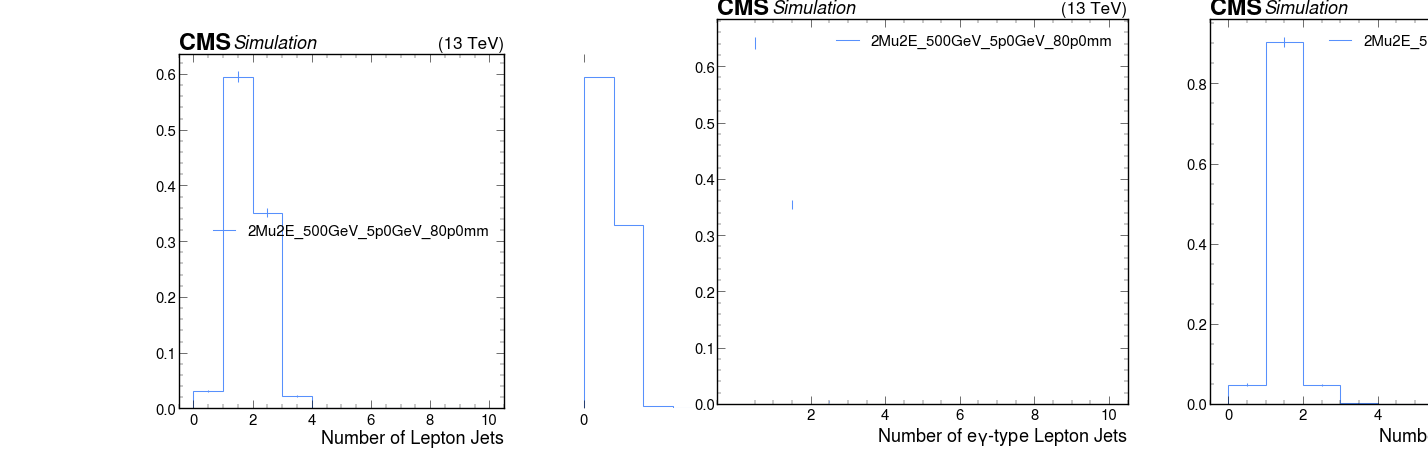

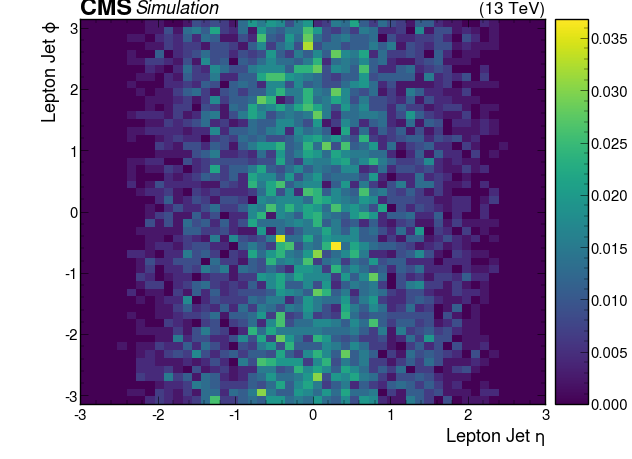

In [5]:
plots = [
    "lj_n",
    "egm_lj_n",
    "mu_lj_n",
]
plot_row(plots, samples, density=True)
plot_row_2d(["lj_eta_phi"])

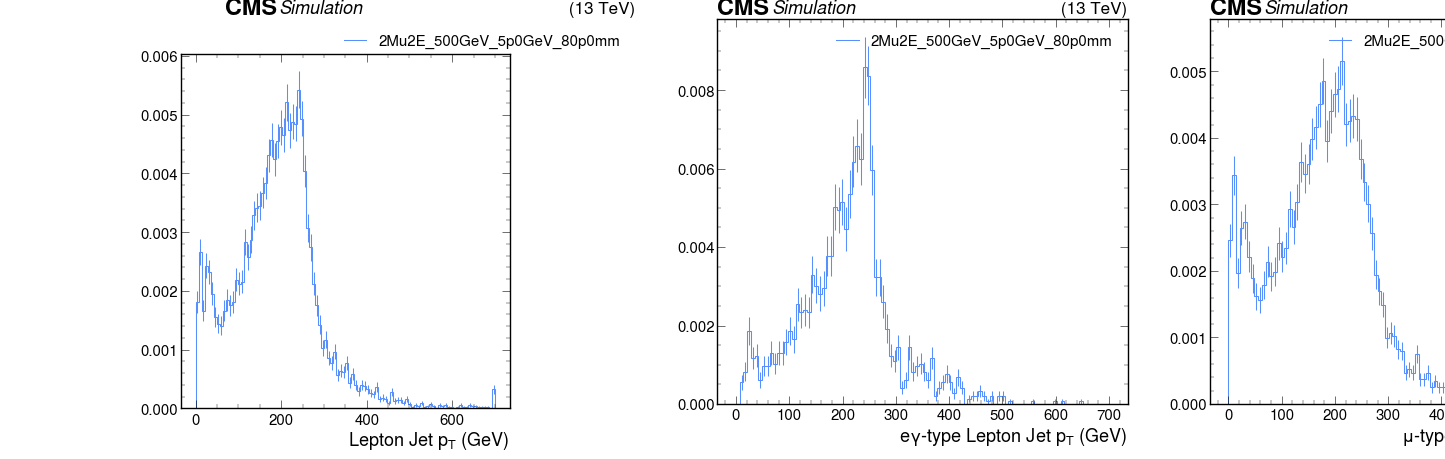

In [6]:
plots = [
    "lj_pt",
    "egm_lj_pt",
    "mu_lj_pt",
]
plot_row(plots, samples, density=True)

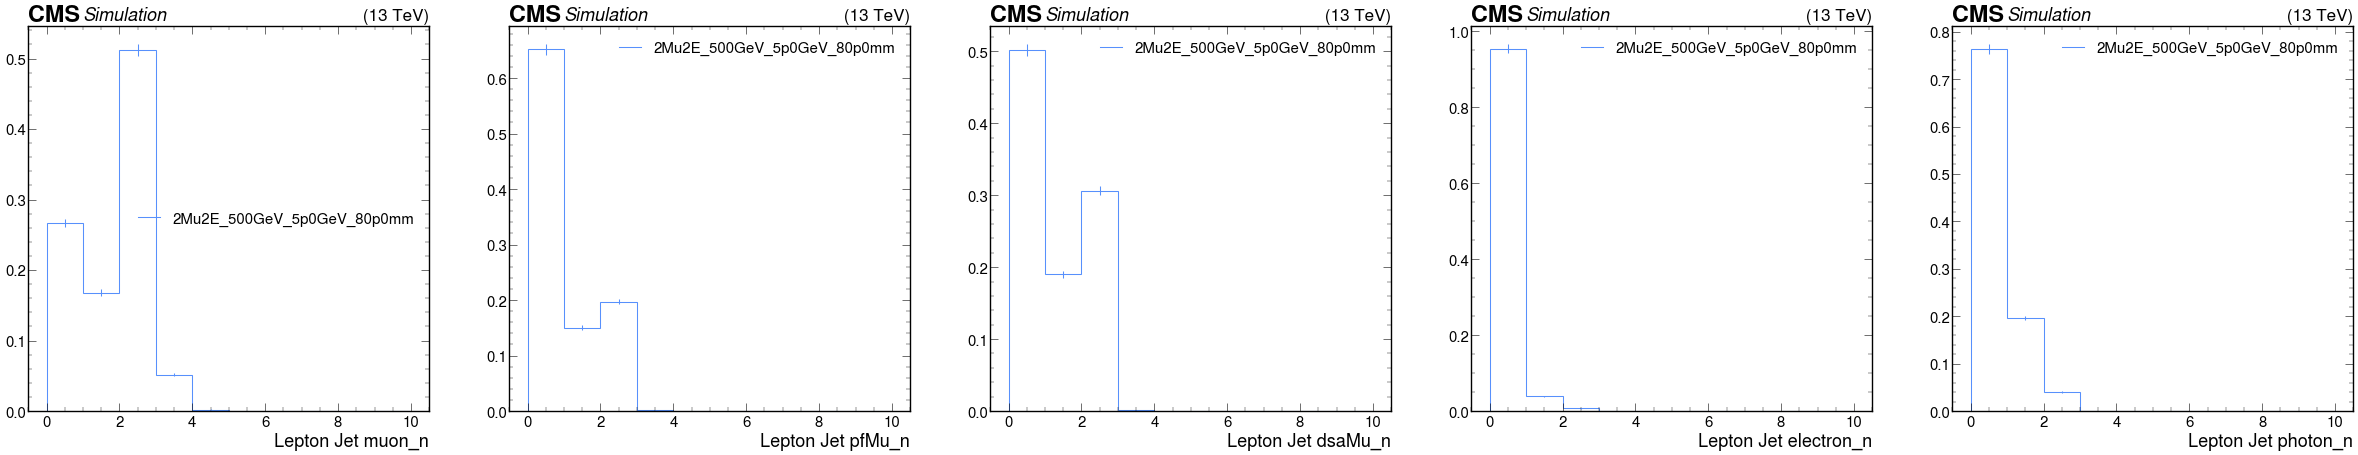

In [7]:
plots = [
    "lj_muonN",
    "lj_pfMuN",
    "lj_dsaMuN",
    "lj_electronN",
    "lj_photonN",
]
plot_row(plots, samples, density=True)